In [1]:
import numpy            as np
import pandas           as pd
import matplotlib.pylab as plt
import seaborn          as sns

# **Analyse des données de Netflix**

## _Nettoyage_

In [2]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# infos détaillées
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


'release_year' est en `int`.  
director, cast, counrty, date_added, rating et duration ont des valeurs manquantes.

In [5]:
# Que les types de données
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

1. Enlever les colonnes inutiles.  
Ici, il n'y en a qu'une.  
'Show_idi'.

In [6]:
data = data.drop('show_id', axis=1)
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


2. Retirer  les valeurs manquantes.  
   6 colonnes sont concernées :
   * director,
   * cast,
   * counrty,
   * date_added,
   * rating,
   * duration.

In [7]:
# Combiens de valeurs manquentes
valeurs_manquantes = data.isnull().sum()
valeurs_manquantes

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Pour trouver celles qui manquent, il faut faire des recherches basées d'autres valeurs,  
E.g. le nom du directeur de production, les acteurs ...  
Ici, les lignes de ces valeurs seront supprimées.  
<!-- L'influence sur les analyses ne sera pas très grave. -->

In [8]:
# Suppression des lignes aux valeurs manquantes colonnes par colonnes
data = data.dropna(subset=['country'])
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
# Manque t-il encore des pays ?
valeurs_manquantes = data.isnull().sum()
valeurs_manquantes

type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Combien de lignes reste t-il ?
data.shape

(7976, 11)

In [11]:
# Remplacer les notes manquantes par la plus répendue
# Quel est le mode ?
data['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [12]:
# Sasn l'indice
data['rating'].mode()[0]

'TV-MA'

In [13]:
# Remplacer la valeur
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_18054/4250348504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna(data['rating'].mode()[0])


☝️ Info que je modifie le fichier

In [14]:
# Manque t-il encore des notes ?
data['rating'].isnull().sum()

np.int64(0)

In [15]:
# Nouvelles liste des valeurs mavaleurs manquantes
valeurs_manquantes = data.isnull().sum()
valeurs_manquantes

type               0
title              0
director        2225
cast             671
country            0
date_added         9
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
# Supprimer la date d'ajout et la durée
data = data.dropna(subset=['date_added', 'duration'])
data.isnull().sum()

type               0
title              0
director        2216
cast             671
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
# cast est director ne serviront pas
# Quelle quantité de valeurs unique
data.nunique()

type               2
title           7964
director        4286
cast            7095
country          748
date_added      1733
release_year      73
rating            14
duration         212
listed_in        497
description     7949
dtype: int64

In [18]:
# Y a-t-il des doublons ?
data.duplicated().sum()

np.int64(0)

In [19]:
# Rendre la date exploitableabs
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data.head()

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_18054/2688683202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


☝️ Le messaeg est lié à la gestion des erreurs.

In [20]:
# Extraire l'année dans une colonne
data['year_added'] = data['date_added'].dt.year.astype('Int64')
data.head()

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_18054/2448975934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_added'] = data['date_added'].dt.year.astype('Int64')


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021


In [21]:
# A-t-elle le bon type (int64) ?
data['year_added'].dtypes

Int64Dtype()

## _Analyse descriptive_

La colonne 'rating' doit être expliquée.    
"`g`" & "`tv-g`" pour tous les âges  
"`tv-y`" de 2 à 6 ans  
"`tv-y7`" dés 7 ans  
"`tv-y7-fv`" recommandé dès 7 ans
"`pg`" certains passages ne sont pas pour les enfants  
"`pg-13`" interdit aux moins de 12 ans  
"`tv-14`" il y a des passages inadaptés au moins de 14 ans  
"`tv-pg`" inadapté aux jeunes enfants  
"`R`" les moins de 18 ans sont accompagnés d'un adulte  
"`tv_ma`" pour les adultes  
"`nc-17`" public adulte uniquement  
"`nr`" et "`ur`" non évalué

Text(0, 0.5, 'Fréquence en pourcentage')

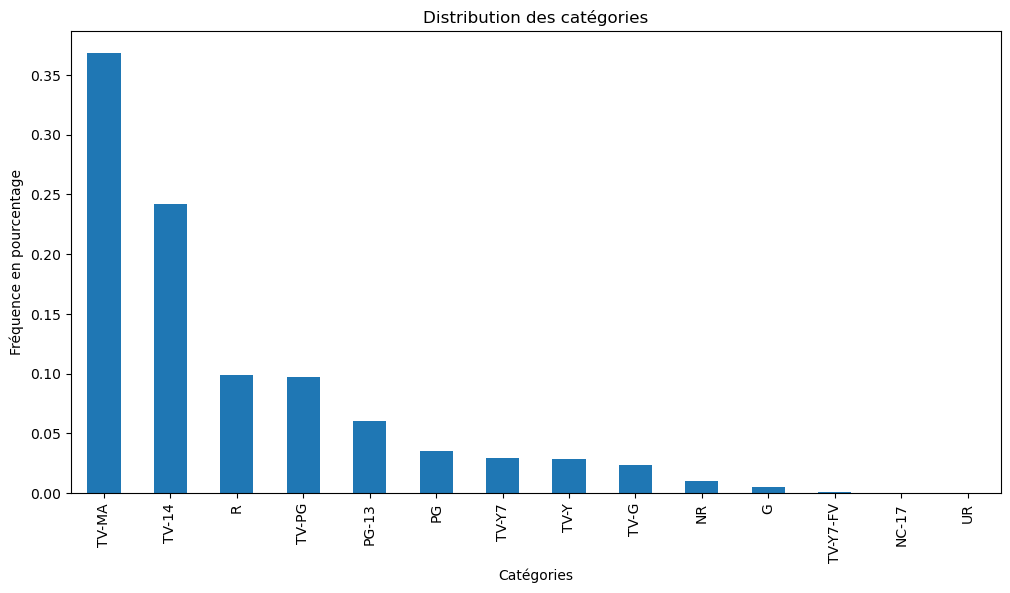

In [22]:
# Quel est le pourcentage par catégories ? Utiliser `normalize` pour avoir le pourcentage.
# Avec %matplotlib
plt.figure(figsize=(12,6))
data['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution des catégories')
plt.xlabel('Catégories')
plt.ylabel('Fréquence en pourcentage')

Text(0.5, 1.0, 'Distribution des catégories')

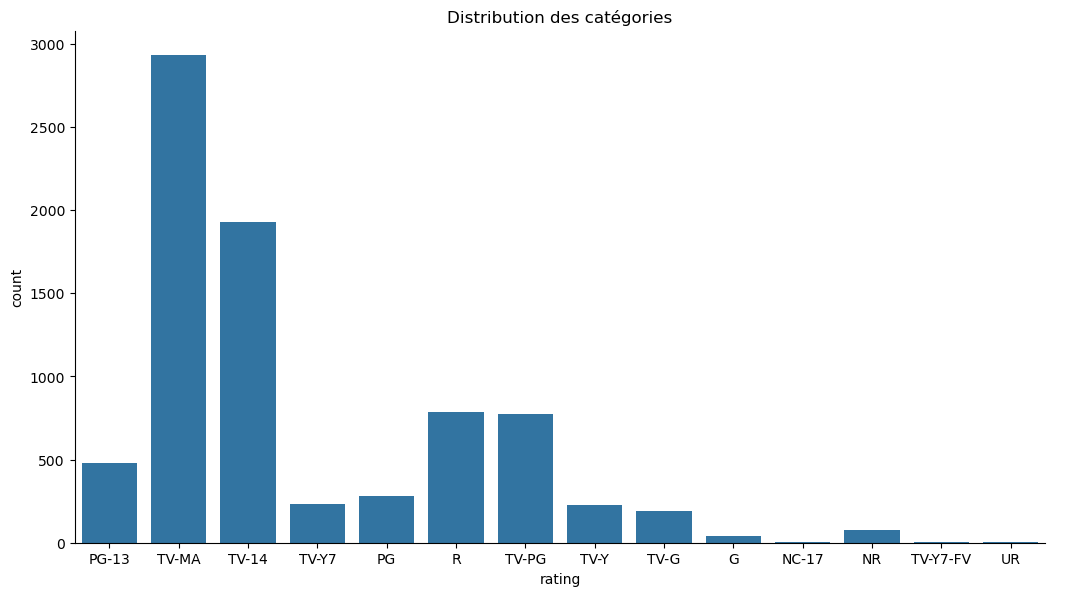

In [23]:
# Via seaborn
sns.catplot(x='rating', data=data, kind='count')
fig = plt.gcf() # get current figure
fig.set_size_inches(12,6)
plt.title('Distribution des catégories')

<Axes: ylabel='count'>

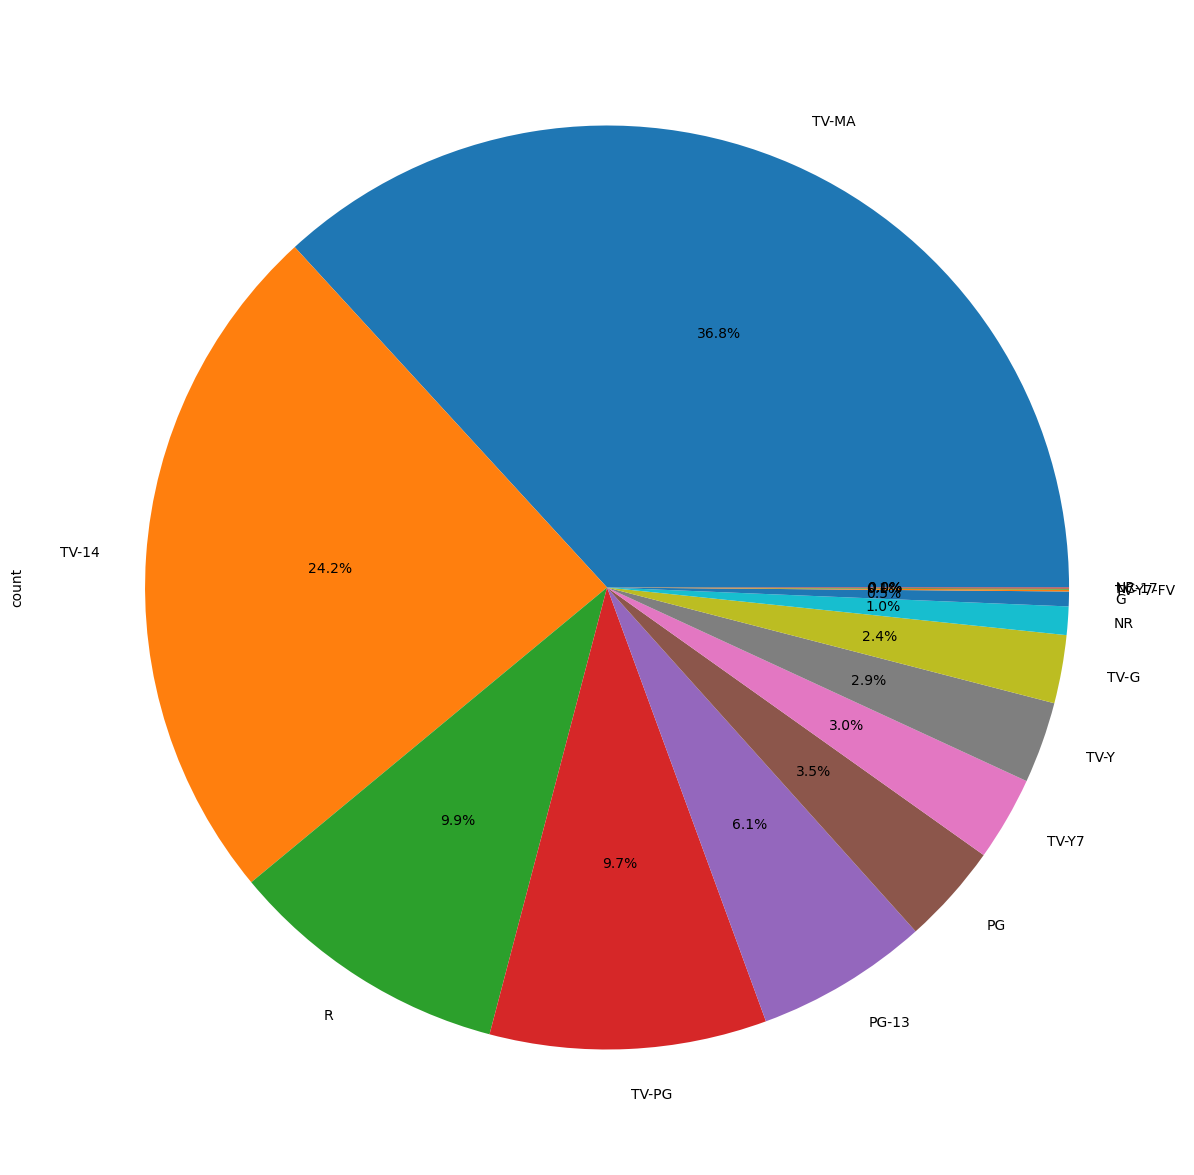

In [24]:
# En diagramme circulaire
# autopct ➜ chiffre aprés la virgule / plot.pie ➜ diagramme circulaire
data['rating'].value_counts().plot.pie(autopct= '%1.1f%%', shadow= False, figsize= (15,15))

## _Production selon le type_

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_18054/1783533706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'type', data = data, kind = "count", palette=custom_palette)


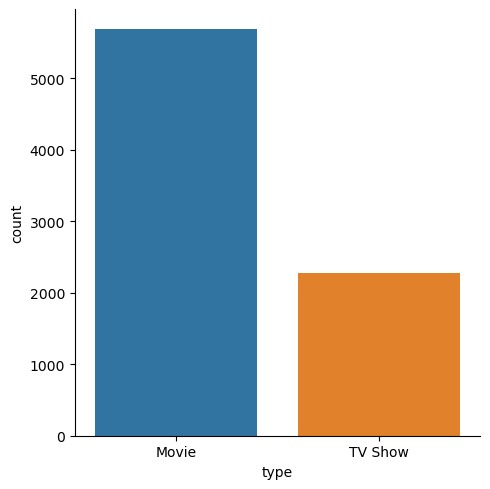

In [25]:
custom_palette = ["#1f77b4", "#ff7f0e"]  # Bleu et orange
sns.catplot(x = 'type', data = data, kind = "count", palette=custom_palette)

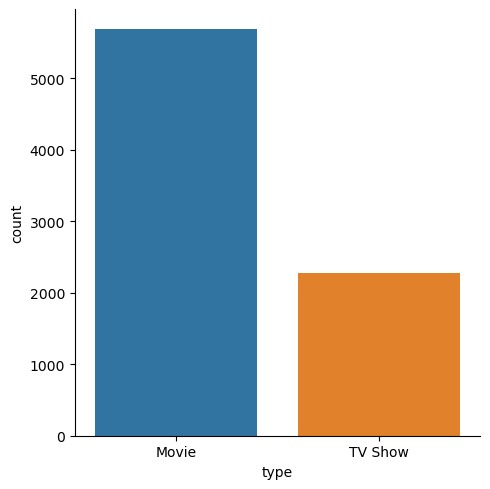

In [26]:
custom_palette = ["#1f77b4", "#ff7f0e"]  # Bleu et orange
sns.catplot(
    x='type',
    hue='type',  # Assigner la même variable que `x` à `hue`
    data=data,
    kind="count",
    palette=custom_palette,
    legend=False  # Désactiver la légende si elle n'est pas nécessaire
)     # Contemporain, très long

In [27]:
# La fréquence en texte
data['type'].value_counts(normalize=True)

type
Movie      0.714214
TV Show    0.285786
Name: proportion, dtype: float64

In [28]:
# En pourcentage au lieu d'entre zéro et un
data['type'].value_counts(normalize=True)*100

type
Movie      71.421396
TV Show    28.578604
Name: proportion, dtype: float64

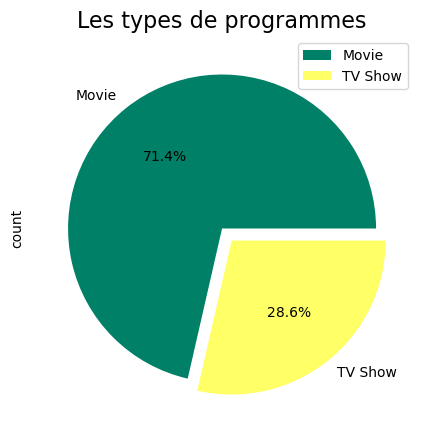

In [29]:
# Afficher en diagramme circulaire (explode sépare les éléments)
data['type'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = False, cmap = 'summer', figsize = (5,5), explode = [0,0.1])
plt.title('Les types de programmes', fontsize = 16)
plt.legend()

## _Productions ajoutées par année_

Text(0, 0.5, 'Productions')

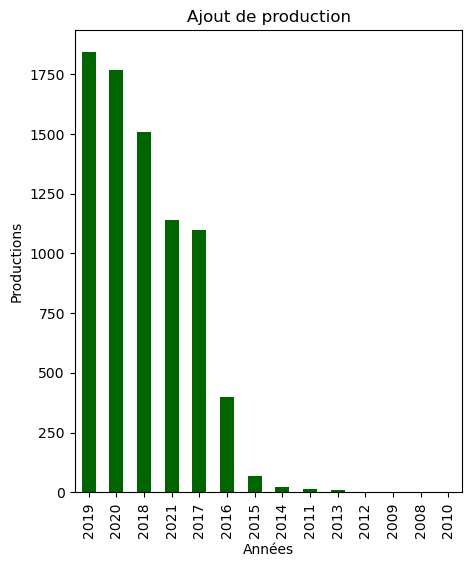

In [30]:
plt.figure(figsize=(5,6))
data['year_added'].value_counts().plot.bar(color='darkgreen')
plt.title('Ajout de production')
plt.xlabel('Années')
plt.ylabel('Productions')